In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

Url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

covid_data = pd.read_csv(Url)

covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
rows = len(covid_data.axes[0])
columns = len(covid_data.axes[1])
print("No.of rows:", rows)
print("No.of columns:", columns)

No.of rows: 57394
No.of columns: 49


In [3]:
covid_data.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [5]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [6]:
len(pd.unique(covid_data['location'])) 

216

In [7]:
#Finding maximum & mean value in 'total_cases'.
print("maximum value in 'total_cases': ", covid_data['total_cases'].max())
print("mean value in 'total_cases': ", covid_data['total_cases'].mean())

maximum value in 'total_cases':  55154651.0
mean value in 'total_cases':  167797.3688753302


In [8]:
#Finding 25%,50% & 75% quartile value in 'total_deaths'.
print(covid_data.total_deaths.quantile([0.25,0.5,0.75]))

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [ ]:
#Finding which continent has maximum 'human_development_index'.

In [9]:
print("continent that has maximum 'human_development_index':",covid_data[covid_data['human_development_index'] == covid_data['human_development_index'].max()].continent.unique())


continent that has maximum 'human_development_index': ['Europe']


In [10]:
#Find which continent has minimum 'gdp_per_capita'.
print("continent that has maximum 'gdp_per_capita':",covid_data[covid_data['gdp_per_capita'] == covid_data['gdp_per_capita'].min()].continent.unique())

continent that has maximum 'gdp_per_capita': ['Africa']


In [11]:
#Filtering  the dataframe with only this columns

covid = covid_data.filter(['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'])
covid

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [ ]:
# Data Cleaning

In [12]:
covid.drop_duplicates(keep=False,inplace=True)
covid

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [13]:
# Finding missing values in all columns
covid.isnull()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,True,False,False
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
57389,True,False,False,False,False,True,True
57390,True,False,False,False,False,True,True
57391,True,False,False,False,False,True,True
57392,True,False,False,False,False,True,True


In [14]:
# Removing all observations where continent column value is missing
covid = covid[covid.continent != 0]

In [15]:
#Filling all missing values with 0
covid.fillna(0, inplace = True)
covid.isnull()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
57389,False,False,False,False,False,False,False
57390,False,False,False,False,False,False,False
57391,False,False,False,False,False,False,False
57392,False,False,False,False,False,False,False


In [ ]:
#Convert date column in datetime format using pandas.to_datetime

In [16]:
covid["date"]= pd.to_datetime(covid["date"])
covid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57394 entries, 0 to 57393
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   continent                57394 non-null  object        
 1   location                 57394 non-null  object        
 2   date                     57394 non-null  datetime64[ns]
 3   total_cases              57394 non-null  float64       
 4   total_deaths             57394 non-null  float64       
 5   gdp_per_capita           57394 non-null  float64       
 6   human_development_index  57394 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.5+ MB


In [18]:
#new column month after extracting month data from date column.
covid['month']= covid['date'].dt.month 
covid

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...
57389,0,International,2020-11-13,696.0,7.0,0.000,0.000,11
57390,0,International,2020-11-14,696.0,7.0,0.000,0.000,11
57391,0,International,2020-11-15,696.0,7.0,0.000,0.000,11
57392,0,International,2020-11-16,696.0,7.0,0.000,0.000,11


In [ ]:
#Data Aggregation:

In [19]:
#Finding max in all columns using groupby function on 'continent' column
covid.groupby(['continent']).max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [20]:
df_groupby = covid.groupby(['continent']).max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [ ]:
#Feature Engineering 

In [21]:
#Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths']/df_groupby['total_cases']
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,0,World,2020-12-11,55154651.0,1328537.0,15469.207,0.000,12,0.024087
1,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
2,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
3,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
4,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
5,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685
6,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12,0.028251


In [ ]:
#Data Visualization :

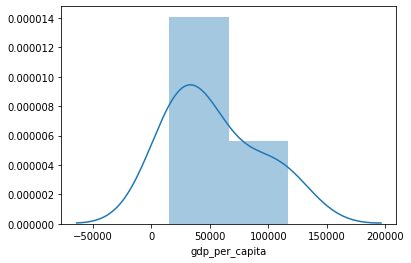

In [26]:
displot = sns.distplot(df_groupby['gdp_per_capita'])
displot.figure.savefig("9a_displot.png")

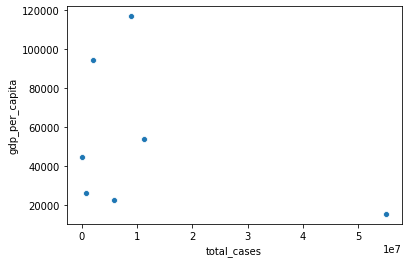

In [27]:
#scatter plot
scatterplot = sns.scatterplot(data=df_groupby, x='total_cases', y='gdp_per_capita')
fig = scatterplot.get_figure()
fig.savefig("9b_scatterplot.png")

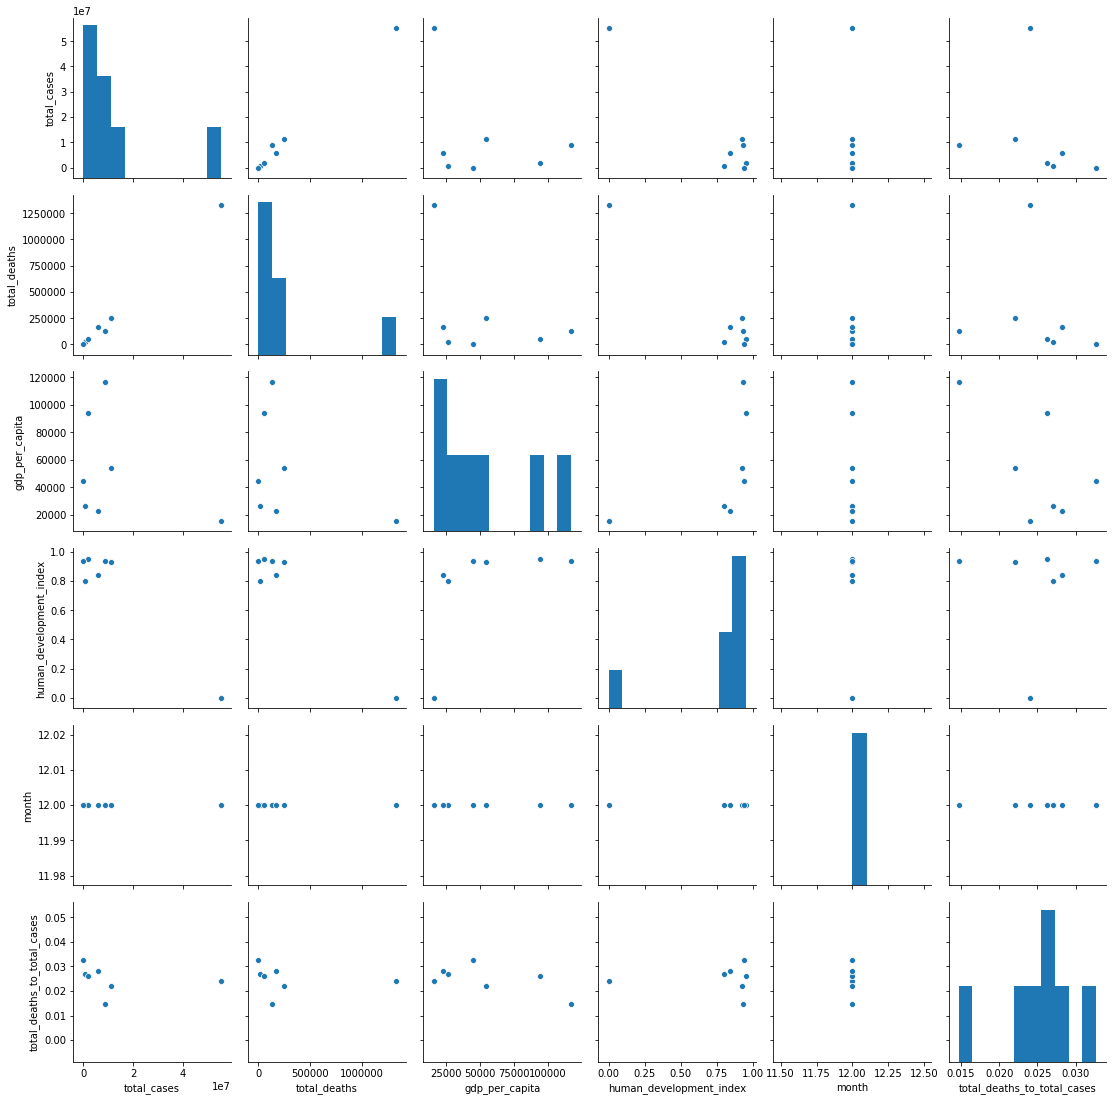

In [28]:
#Plot Pairplot on df_groupby dataset.
fig = sns.pairplot(df_groupby)
fig.savefig("9c_pairplot.png")


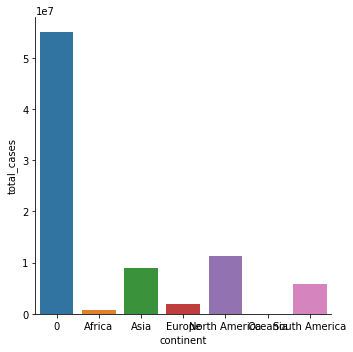

In [29]:
#Plot bar plot of 'continent' column with 'total_cases' .
fig = sns.catplot(x='continent',y='total_cases',data=df_groupby,kind="bar")
fig.savefig("9d_barplot.png")

In [30]:
#Saving the df_groupby dataframe in your local drive using pandas.to_csv function
df_groupby.to_csv('df_groupby.csv')